# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [2]:
%run "..\Startup_py3.py"
sys.path.append(r"C:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

42564


In [3]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'C:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [4]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections_3color')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

creating folder: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color


# Illumination_correction

In [6]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if ('Cy' in _fd and 'denoise' in _fd) or 'H0R0' in _fd]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 38
- Number of field of views: 70
['\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H33RCy7_denoise', '\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H34RCy5_denoise', '\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H35RCy3_denoise']


In [7]:
# shared parameters
single_im_size = np.array([30,2048,2048])
all_colors = ['750','647','561','488','405']
# image and threads
num_images = 60
num_threads = 15

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '561', '488', '405'] illumination profiles
-- 60 among 70 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H0R0
++ start multi-processing illumination profile calculateion with 15 threads for 60 images in 1440.79s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color\illumination_correction_647_2048x2048.npy
--- saving 561 profile into file: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color\illumination_correction_561_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color\illumination_correction_488_2048x2048.npy
--- saving 405 pro

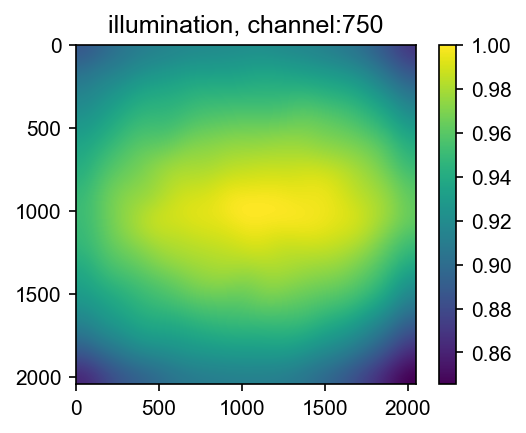

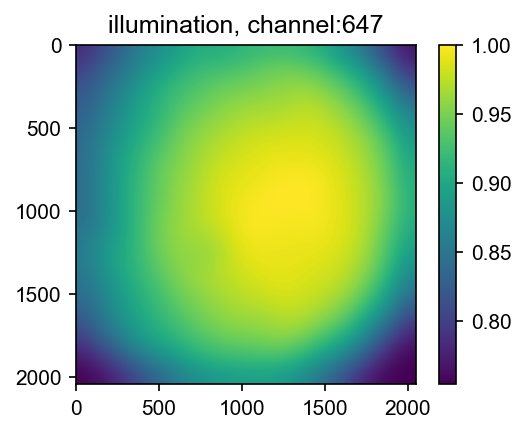

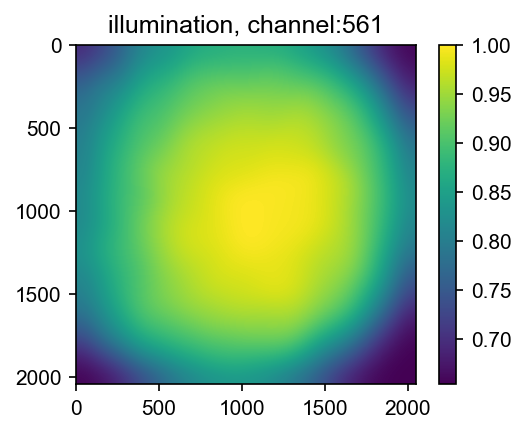

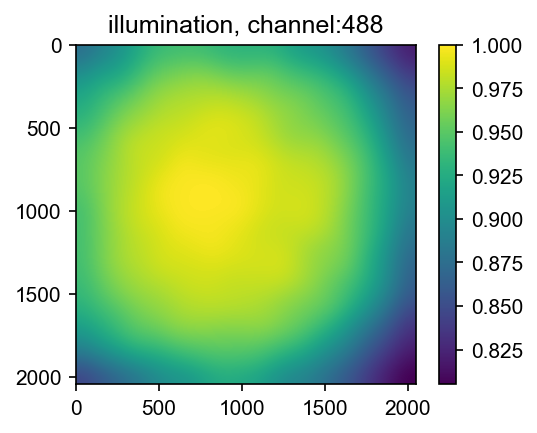

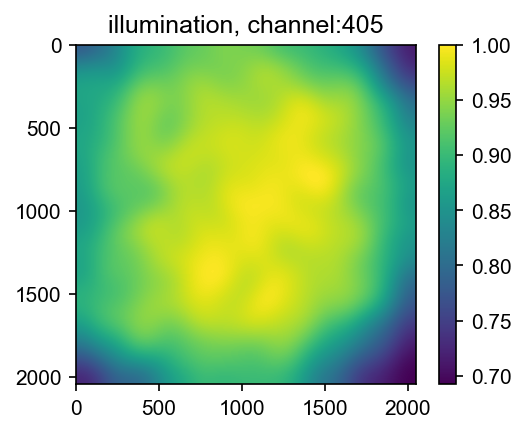

-- finish generating illumination profiles, time:1471.69s


In [8]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=True,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [9]:
cc_folder = folders[1]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H33RCy7_denoise \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 15 threads in 2762.278s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 2.55370223e-01  6.37630057e-03 -1.90604102e-05  5.20823891e-05] with rsquare=0.07458917715667046
-- constants: [-3.19912260e-01  6.91974694e-04 -1.76972295e-03  6.09780308e-05] with rsquare=0.9363081061710699
-- constants: [-1.32994909e-01  8.67970963e-04 -7.56433777e-05 -1.78283026e-03] with rsquare=0.9411571977749078
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color


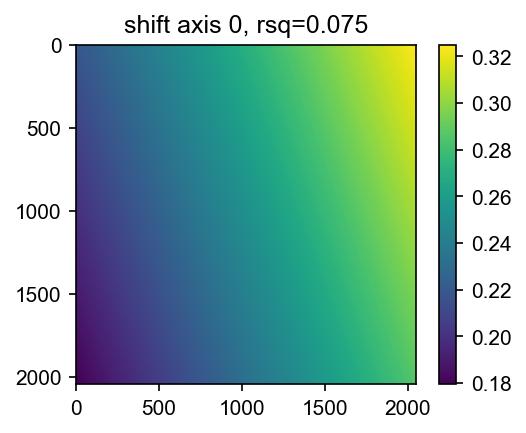

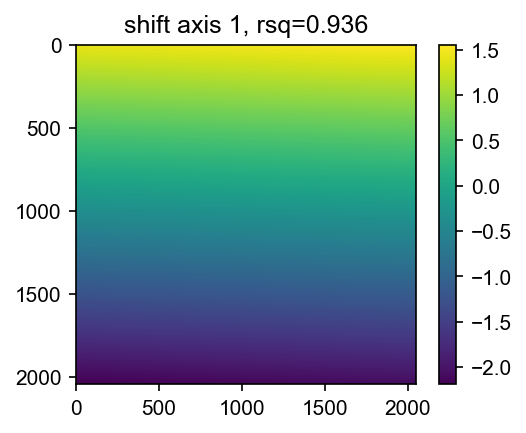

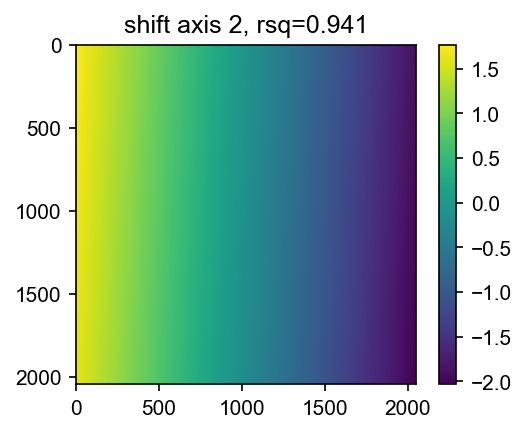

In [10]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    overwrite_temp=False, )

### check chromatic abbrevation, 750-647

In [11]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    corr_channels=['750', '647'],
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     corr_channels=['750', '647'],
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_05.dax  in 17.643s
-- removing hot pixels for channels:['647', '488'] in 15.918s
-- illumination correction for channels: 647, 488, in 3.059s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 37.623s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H33RCy7_denoise\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_const.pkl
	

<IPython.core.display.Javascript object>


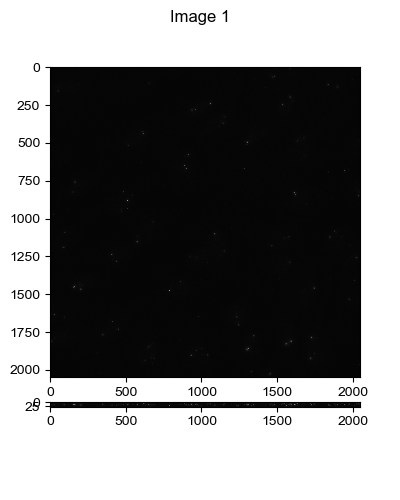

In [12]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [13]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([  0.18, -25.43,   4.99]), _consts=[array([ 2.55370223e-01,  6.37630057e-03, -1.90604102e-05,  5.20823891e-05]), array([-3.19912260e-01,  6.91974694e-04, -1.76972295e-03,  6.09780308e-05]), array([-1.32994909e-01,  8.67970963e-04, -7.56433777e-05, -1.78283026e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [14]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 123 seeded, 

C:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


normalize total background:165.00, 123 fitted in 65.891s.
-- start fitting spots in channel:750, 126 seeded, 

C:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.


normalize total background:165.00, 126 fitted in 67.324s.
-- start fitting spots in channel:647, 149 seeded, normalize total background:385.00, 149 fitted in 65.817s.


<IPython.core.display.Javascript object>


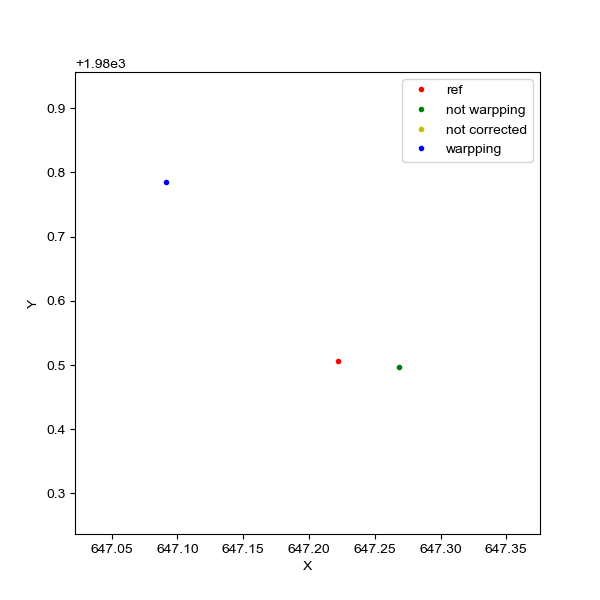

In [15]:
%matplotlib notebook
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not corrected')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [ ]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_raw_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts)
print(_new_drift)

## chromatic for 561

In [16]:
cc_folder = folders[3]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H35RCy3_denoise \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 15 threads in 2696.845s.
++ fitting polynomial orders: [1 1 1]
-- constants: [-7.87472349e-01  1.08409615e-03  4.61172918e-05 -4.01623152e-06] with rsquare=0.017107036401367903
-- constants: [ 2.55376695e-01  2.45913824e-02  1.51697265e-03 -4.57407162e-05] with rsquare=0.9030761828208472
-- constants: [2.15968660e-01 2.43926596e-03 6.00462798e-05 1.53449110e-03] with rsquare=0.9220040859340188
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color


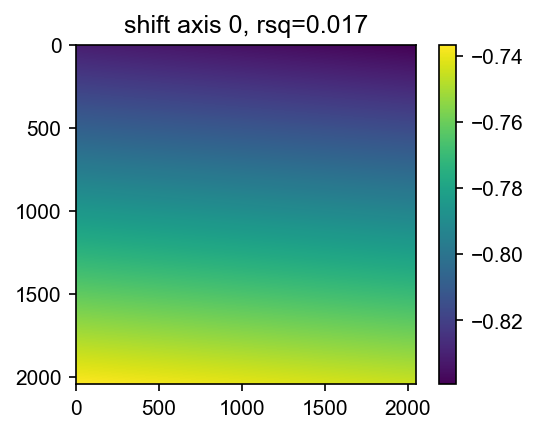

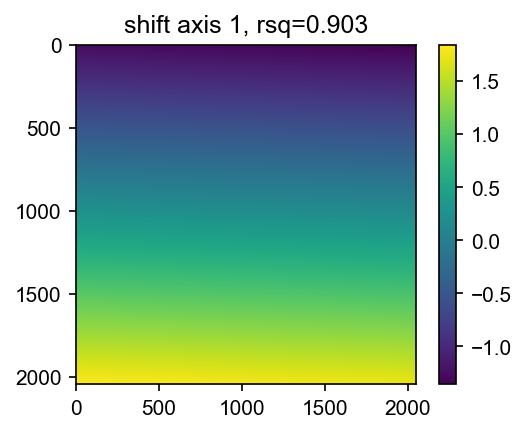

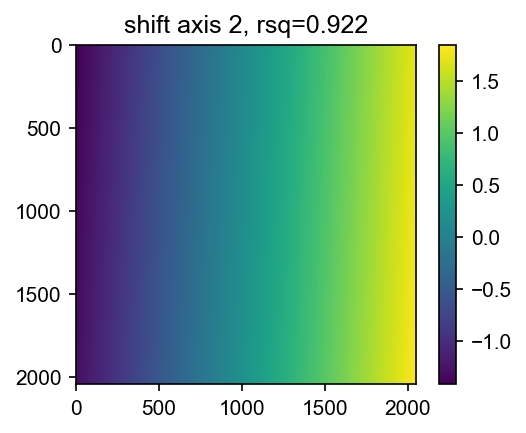

In [17]:
%matplotlib inline
reload(io_tools.load)
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '561',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    overwrite_temp=False)

### check chromatic abbrevation, 561-647

In [18]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [561], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [561], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_05.dax  in 21.214s
-- removing hot pixels for channels:['647', '488'] in 15.818s
-- illumination correction for channels: 647, 488, in 3.046s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 41.123s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H35RCy3_denoise\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_const.pkl
	

<IPython.core.display.Javascript object>


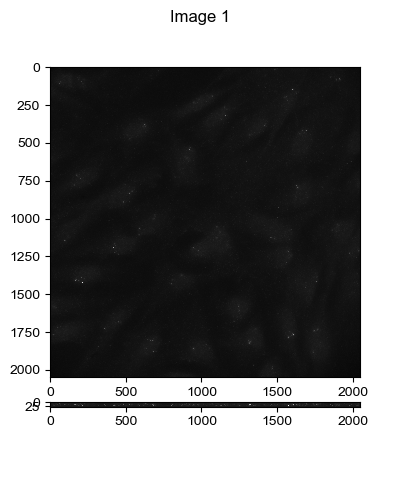

In [19]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [20]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([-1.93, 21.29, -8.42]), _consts=[array([-7.87472349e-01,  1.08409615e-03,  4.61172918e-05, -4.01623152e-06]), array([ 2.55376695e-01,  2.45913824e-02,  1.51697265e-03, -4.57407162e-05]), array([2.15968660e-01, 2.43926596e-03, 6.00462798e-05, 1.53449110e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [21]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '561', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '561', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:561, 240 seeded, 

C:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.
C:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:204: RuntimeWarning: overflow encountered in exp
  ws = delta_ws/(1.+np.exp(w_))+min_ws
C:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:192: RuntimeWarning: overflow encountered in exp
  c2 = 2.*delta/(1.+np.exp(c2_))-delta+self.center_est[2]
C:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


normalize total background:405.00, 240 fitted in 70.720s.
-- start fitting spots in channel:561, 229 seeded, normalize total background:405.00, 229 fitted in 70.533s.
-- start fitting spots in channel:647, 149 seeded, normalize total background:385.00, 149 fitted in 68.699s.


<IPython.core.display.Javascript object>


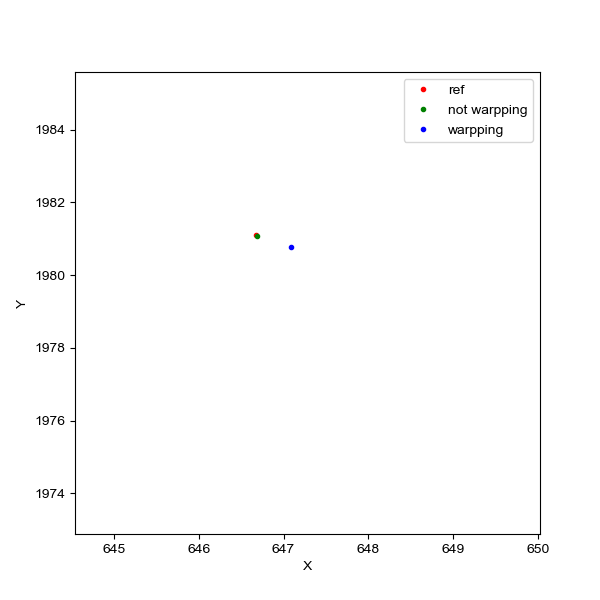

In [22]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
#plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

# bleedthrough correction

In [27]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647', '561']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750', '647', '561'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':200,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'C:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 60 images in 15 threads in 3923.213s.
- check 3477 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True  True]
-- iter: 1, kept in this round: 0.880, total: 0.880


C:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:174: RuntimeWarning: divide by zero encountered in true_divide
  _nb_weights = 1 / np.linalg.norm(_nb_coords-_coord, axis=1)
C:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:175: RuntimeWarning: invalid value encountered in true_divide
  _nb_weights = _nb_weights / np.sum(_nb_weights)


[ True  True  True ...  True  True  True] [ True  True  True ...  True  True  True]
-- iter: 2, kept in this round: 0.897, total: 0.789
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True  True]
-- iter: 3, kept in this round: 0.945, total: 0.745
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True  True]
-- iter: 4, kept in this round: 0.933, total: 0.695
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True  True]
-- iter: 5, kept in this round: 0.952, total: 0.662
- 2302 pairs passed.
-- 2302 spots are used to generate profiles from 750 to 647
[ 1.13400662e-01  2.20117926e-04  1.94096154e-05  2.20168781e-05
 -1.64296485e-06 -1.30107276e-08 -1.14978493e-07 -9.12254539e-09
 -6.25029734e-10 -8.89958080e-09] 0.1374489269867265
[ 2.58700771e+02 -5.13169742e-01  6.32898888e-02  1.01800005e-01
  1.96291159e-02 -1.16033172e-04 -1.38407282e-04 -2.97249017e-05
 -2.00378737e-06 -4.00723058e-05] 0.8523934542520054
-- saving

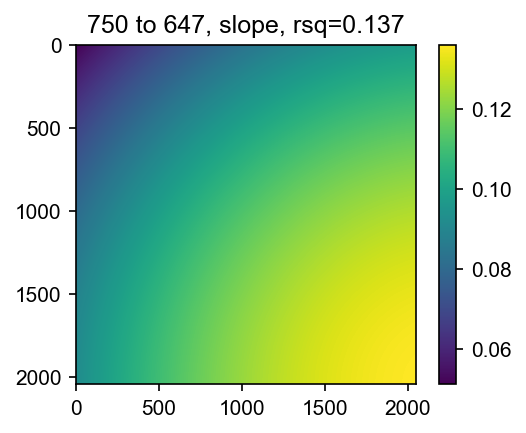

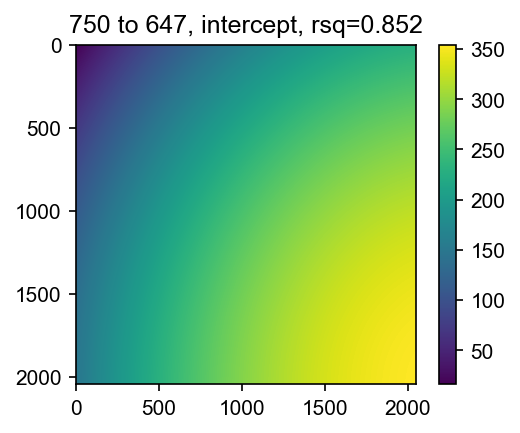

-- not enough spots (0) from 750 to 561
-- not enough spots (5) from 647 to 750
- check 938 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
 False  True  True False  True False  True False  True  True  True False
 False  True False False False False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False False False
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  T

[ True  True False  True False  True  True  True  True  True False  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True False  True  True  True  True False
  True  True False False  True  True  True  True  True False False  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True False
  True False  True False  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True False  True  True  True  True  True  True  True False  True
  True  True False False  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  T

[False  True False  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True False  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False  True  True  True  T

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  T

[ True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

-- saving bleedthrough temp profile from channel: 647 to channel: 561.


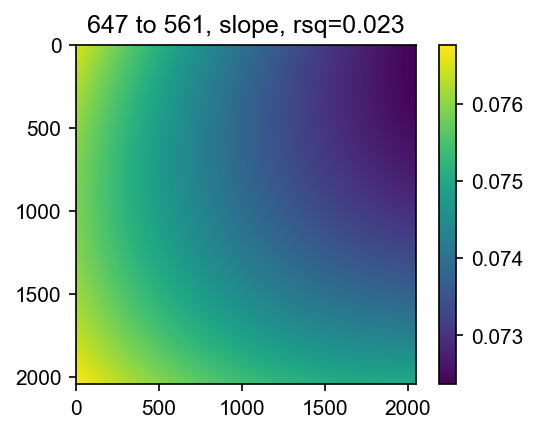

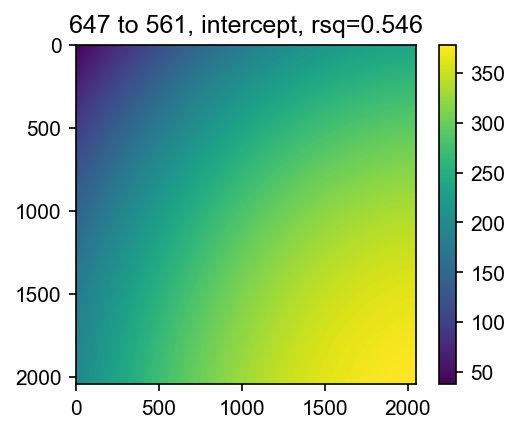

-- not enough spots (0) from 561 to 750
-- not enough spots (11) from 561 to 647
-- saving to file:\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\Corrections_3color\bleedthrough_correction_750_647_561_2048_2048.npy


In [28]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:4], rsq_th=0.81,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [29]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [30]:
folders

['\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H0R0',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H33RCy7_denoise',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H34RCy5_denoise',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20200624_RPE1_chr2_LADs\\H35RCy3_denoise']

In [31]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[1], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H33RCy7_denoise\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H33RCy7_denoise\Conv_zscan_03.dax  in 17.832s
-- removing hot pixels for channels:['750', '647', '561'] in 23.793s
-- illumination correction for channels: 750, 647, 561, in 4.549s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 47.659s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H33RCy7_denoise\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading i

<IPython.core.display.Javascript object>


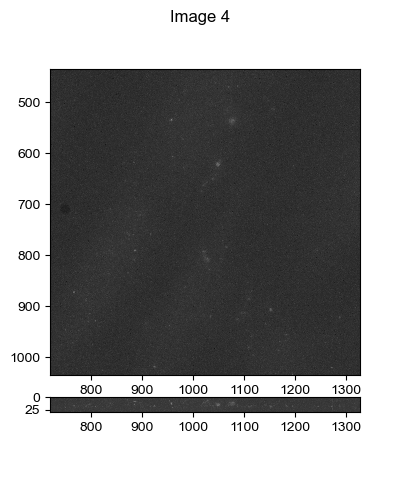

In [32]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [33]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[2], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_03.dax  in 17.885s
-- removing hot pixels for channels:['750', '647', '561'] in 23.897s
-- illumination correction for channels: 750, 647, 561, in 4.546s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 47.512s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H34RCy5_denoise\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading b

<IPython.core.display.Javascript object>


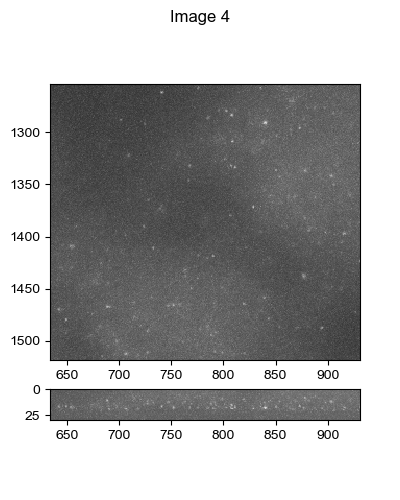

In [34]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[1], cy5_corr_ims[1], cy5_raw_ims[2], cy5_corr_ims[2]])

## Check bleedthrough for cy3

In [38]:
reload(ia.io_tools.load)
cy3_filename = os.path.join(folders[3], fovs[3])

cy3_raw_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy3_corr_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H35RCy3_denoise\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H35RCy3_denoise\Conv_zscan_03.dax  in 18.169s
-- removing hot pixels for channels:['750', '647', '561'] in 23.909s
-- illumination correction for channels: 750, 647, 561, in 4.532s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 47.792s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20200624_RPE1_chr2_LADs\H35RCy3_denoise\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading b

In [39]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy3_raw_ims[1], cy3_corr_ims[1], cy3_raw_ims[2], cy3_corr_ims[2]])

<IPython.core.display.Javascript object>